In [161]:
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
from matplotlib import pyplot as plt

np.random.seed(42)

In [162]:
def poisson(x,l):
    return np.exp(-l)*np.power(l,x)/math.factorial(x)

# Caso 1

In [163]:
n=10

curr_acc_prob = 0
probabilities = np.zeros(n+1)
accumulated_probabilities = np.zeros(n+1)

for i in range(len(probabilities)):
    val = poisson(i, 2)
    probabilities[i] = val
    curr_acc_prob += val
    accumulated_probabilities[i] = curr_acc_prob

In [164]:
for probability in probabilities.round(5):
    print(probability)

0.13534
0.27067
0.27067
0.18045
0.09022
0.03609
0.01203
0.00344
0.00086
0.00019
4e-05


In [165]:
for acc_probability in accumulated_probabilities.round(5):
    print(acc_probability)

0.13534
0.40601
0.67668
0.85712
0.94735
0.98344
0.99547
0.9989
0.99976
0.99995
0.99999


In [166]:
def simulation_day(tiempo, acc_probability, show_p=False):
    simulation = np.zeros(tiempo)
    if show_p:
        probabilities = np.zeros(tiempo)
    for i in tqdm(range(tiempo)):
        rand_cont = np.random.random()
        if show_p:
            probabilities[i] = rand_cont
        # Find bucket or fallback to the last bucket if no match is found
        bucket = next((j for j, acc_prob in enumerate(acc_probability) if rand_cont <= acc_prob), len(acc_probability) - 1)
        simulation[i] = bucket
    if show_p:
        return simulation, probabilities
    else:
        return simulation

In [167]:
simulation_day(tiempo=8, acc_probability=accumulated_probabilities, show_p=True)

100%|██████████| 8/8 [00:00<?, ?it/s]


(array([1., 5., 3., 2., 1., 1., 0., 4.]),
 array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452, 0.05808361, 0.86617615]))

In [168]:
big_simulation = simulation_day(tiempo=8*300*1_000, acc_probability=accumulated_probabilities, show_p=False)
big_simulation

100%|██████████| 2400000/2400000 [00:05<00:00, 462700.75it/s]


array([2., 3., 0., ..., 4., 2., 2.])

In [169]:
# Tasa promedio de llegada
big_simulation.mean()

1.9997654166666667

In [170]:
freq_simulacion = [
    (big_simulation == i).sum() for i in range(n+1)
]

In [171]:
freq_simulacion

[324296, 650709, 649678, 432791, 215723, 87001, 28824, 8348, 2057, 464, 109]

In [172]:
p_simulacion = freq_simulacion / sum(freq_simulacion)

for p in p_simulacion:
    print(p)

0.13512333333333335
0.27112875
0.27069916666666666
0.18032958333333332
0.08988458333333334
0.03625041666666667
0.01201
0.0034783333333333333
0.0008570833333333333
0.00019333333333333333
4.541666666666667e-05


In [173]:
diff = (p_simulacion-probabilities)
MAE = np.mean(np.divide(diff, probabilities)) * 100
MSE = np.dot(diff, diff) / len(diff)
RMSE = np.sqrt(MSE)

print(f"MAE: {MAE}%")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")

MAE: 1.9073917005396612%
MSE: 3.7493559221714996e-08
RMSE: 0.00019363253657821817


In [174]:
p_simulacion

array([1.35123333e-01, 2.71128750e-01, 2.70699167e-01, 1.80329583e-01,
       8.98845833e-02, 3.62504167e-02, 1.20100000e-02, 3.47833333e-03,
       8.57083333e-04, 1.93333333e-04, 4.54166667e-05])

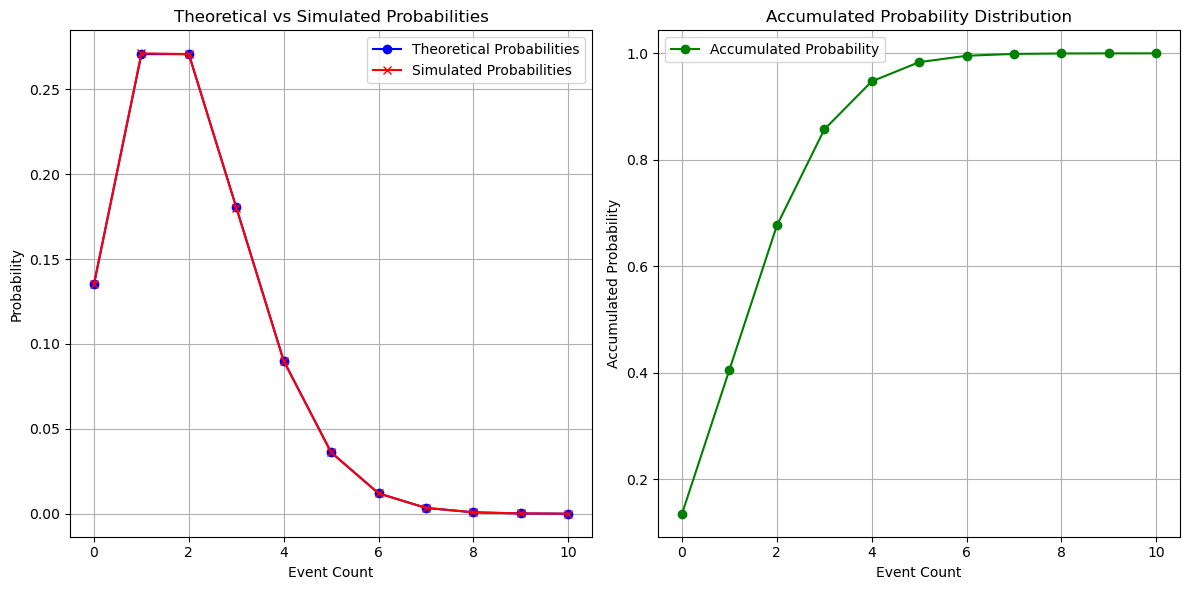

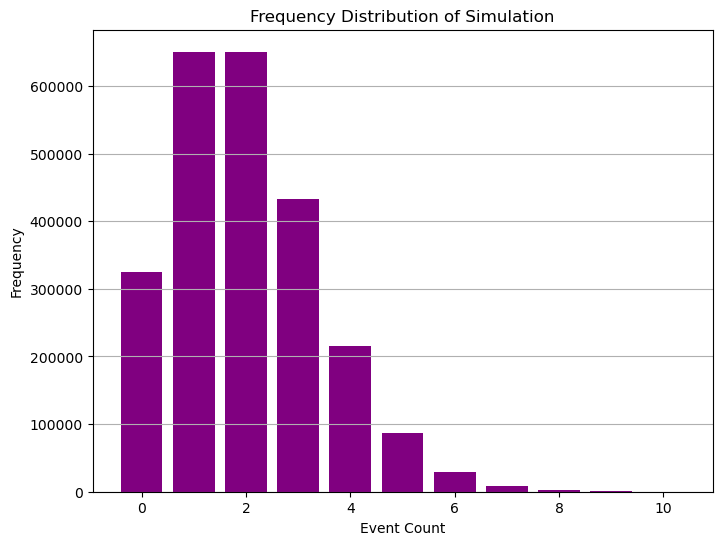

In [175]:
# Probability distribution comparison
plt.figure(figsize=(12, 6))

# Plot the theoretical probabilities
plt.subplot(1, 2, 1)
plt.plot(range(n+1), probabilities, label='Theoretical Probabilities', marker='o', color='blue')
plt.plot(range(n+1), p_simulacion, label='Simulated Probabilities', marker='x', color='red')
plt.xlabel('Event Count')
plt.ylabel('Probability')
plt.title('Theoretical vs Simulated Probabilities')
plt.legend()
plt.grid()

# Accumulated probability plot
plt.subplot(1, 2, 2)
plt.plot(range(n+1), accumulated_probabilities, label='Accumulated Probability', marker='o', color='green')
plt.xlabel('Event Count')
plt.ylabel('Accumulated Probability')
plt.title('Accumulated Probability Distribution')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Frequency distribution of the simulation
plt.figure(figsize=(8, 6))
plt.bar(range(n+1), freq_simulacion, color='purple')
plt.xlabel('Event Count')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Simulation')
plt.grid(axis='y')
plt.show()


# Caso 2

Durante un periodo en que una universidad recibe inscripciones por teléfono, llegan llamadas a una velocidad de una cada dos minutos. Para ello plantee un modelo de simulación y simule 10000 periodos.

In [176]:
lamb = 2.5 # llamadas por cada 5 minutos

poisson(x=3, l=lamb)

0.21376301724973645

In [177]:
n=10

probabilities = np.zeros(n+1)

for i in range(len(probabilities)):
    val = poisson(i, lamb)
    probabilities[i] = val

acc_probability = probabilities.cumsum()

print(probabilities)
print(acc_probability)

[8.20849986e-02 2.05212497e-01 2.56515621e-01 2.13763017e-01
 1.33601886e-01 6.68009429e-02 2.78337262e-02 9.94061650e-03
 3.10644266e-03 8.62900738e-04 2.15725184e-04]
[0.082085   0.2872975  0.54381312 0.75757613 0.89117802 0.95797896
 0.98581269 0.9957533  0.99885975 0.99972265 0.99993837]


In [178]:
sim2 = simulation_day(tiempo=10_000, acc_probability=acc_probability, show_p=False)

100%|██████████| 10000/10000 [00:00<00:00, 363820.44it/s]


In [179]:
sim2

array([4., 0., 6., ..., 1., 2., 1.])

In [180]:
sim2.mean()

2.4952

In [181]:
freq_simulacion_2 = [
    (sim2 == i).sum() for i in range(n+1)
]

In [182]:
freq_simulacion_2

[843, 2028, 2554, 2140, 1367, 670, 272, 79, 32, 13, 2]

In [183]:
p_simulacion_2 = freq_simulacion_2 / sum(freq_simulacion_2)

for i, p in enumerate(p_simulacion_2):
    print(f"Bucket {i} : {p}")

Bucket 0 : 0.0843
Bucket 1 : 0.2028
Bucket 2 : 0.2554
Bucket 3 : 0.214
Bucket 4 : 0.1367
Bucket 5 : 0.067
Bucket 6 : 0.0272
Bucket 7 : 0.0079
Bucket 8 : 0.0032
Bucket 9 : 0.0013
Bucket 10 : 0.0002


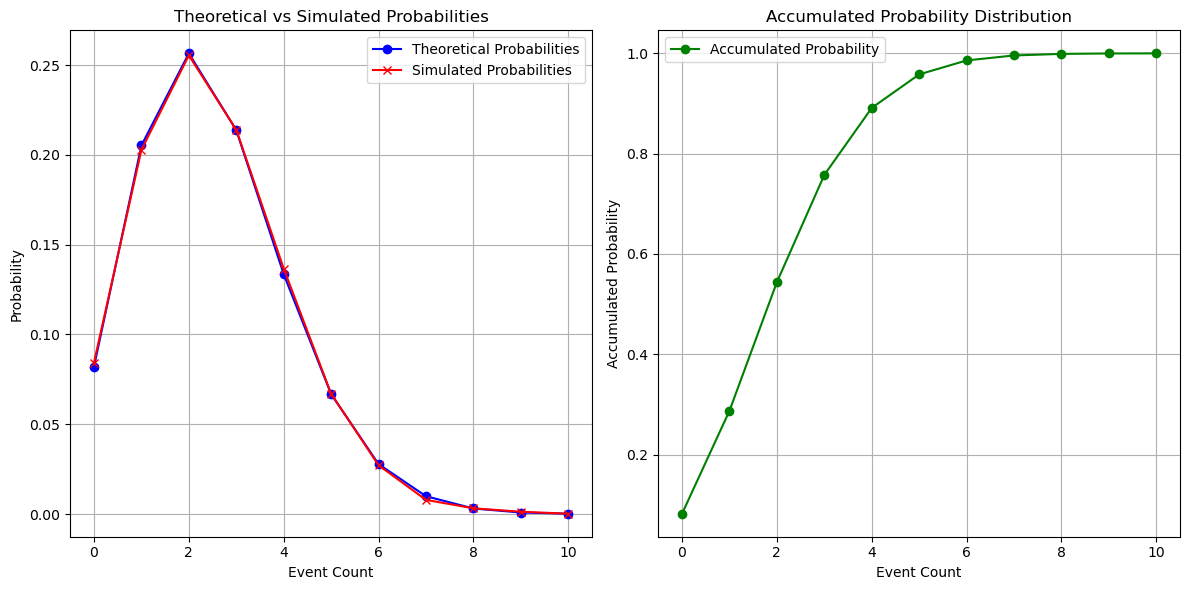

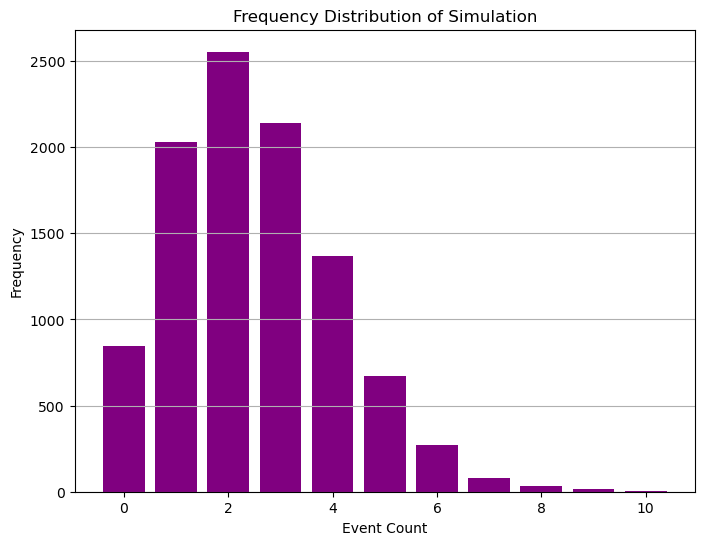

In [184]:
# Probability distribution comparison
plt.figure(figsize=(12, 6))

# Plot the theoretical probabilities
plt.subplot(1, 2, 1)
plt.plot(range(n+1), probabilities, label='Theoretical Probabilities', marker='o', color='blue')
plt.plot(range(n+1), p_simulacion_2, label='Simulated Probabilities', marker='x', color='red')
plt.xlabel('Event Count')
plt.ylabel('Probability')
plt.title('Theoretical vs Simulated Probabilities')
plt.legend()
plt.grid()

# Accumulated probability plot
plt.subplot(1, 2, 2)
plt.plot(range(n+1), acc_probability, label='Accumulated Probability', marker='o', color='green')
plt.xlabel('Event Count')
plt.ylabel('Accumulated Probability')
plt.title('Accumulated Probability Distribution')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Frequency distribution of the simulation
plt.figure(figsize=(8, 6))
plt.bar(range(n+1), freq_simulacion_2, color='purple')
plt.xlabel('Event Count')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Simulation')
plt.grid(axis='y')
plt.show()
